Load the data into new csv files

In [61]:
data = np.loadtxt("combined.csv", delimiter=",")
data = data[0]
print(data)

PermissionError: [Errno 13] Permission denied

In [2]:
# this is being imported seperately due to a bug i found with jupyter lab crashing if it isnt imported seperately, there is no other reason for it
import matplotlib.pyplot as plt

In [3]:
# importing dependencies and setting up the model layers, and any additional factors for tracking training and patience etc.
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots
import pandas as pd
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras
import pathlib
import shutil
import tempfile
from tensorflow.keras import regularizers
def get_callbacks(name):
  return [
    tfdocs.modeling.EpochDots(),
    tf.keras.callbacks.EarlyStopping(monitor='val_binary_crossentropy', patience=200),
    tf.keras.callbacks.TensorBoard(logdir/name),
  ]
logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.Normalization())
model.add(tf.keras.layers.Dense(200, input_dim=20, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.001)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(50, input_dim=20, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.001)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics =['accuracy'])

# features 20

In [4]:
# loading the data set onto the gpu which is then used for training below 
with tf.device('/GPU:0'):
    dataset = np.loadtxt("Combined.csv", delimiter=',')
    np.random.shuffle(dataset)
    dataset_features = dataset[:,:-1]
    dataset_labels = dataset[:, -1].flatten()
    dataset_labels = np.array(dataset_labels)

In [5]:
# double checking dimensions of input data to check they are fit for training
print(dataset_features.shape)
print(dataset_labels.shape)

(2142006, 20)
(2142006,)


In [6]:
# training the model with the given parameters, took 40 epochs before patience was exceeded
with tf.device('/GPU:0'):
    #dataset = np.loadtxt("Combined.csv", delimiter=',')
    #np.random.shuffle(dataset)
    #dataset_features = dataset[:,:-1]
    #dataset_labels = dataset[:, -1].flatten()
    #testx = dataset_features[3800:,0:]
    #testy = dataset_labels[3800:]
    #dataset_features = dataset_features[:3799,0:]
    #dataset_labels = dataset_labels[:3799]
    #dataset_features = dataset_features.to_numpy().flatten()
    #dataset_labels = np.array(dataset_labels)
    #print(dataset_labels)
    #print(dataset_features)
    #dataset_labels = np.transpose(dataset_labels, number)
    model.fit(dataset_features, dataset_labels, epochs=100, batch_size=192, validation_split=0.2, verbose=1, callbacks=callback)
print("Done Fitting")    

Epoch 1/100
8926/8926 [==============================] - 82s 9ms/step - loss: 0.0365 - accuracy: 0.9953 - val_loss: 0.0213 - val_accuracy: 0.9974
Epoch 2/100
8926/8926 [==============================] - 77s 9ms/step - loss: 0.0226 - accuracy: 0.9973 - val_loss: 0.0196 - val_accuracy: 0.9975
Epoch 3/100
8926/8926 [==============================] - 79s 9ms/step - loss: 0.0202 - accuracy: 0.9975 - val_loss: 0.0163 - val_accuracy: 0.9980
Epoch 4/100
8926/8926 [==============================] - 77s 9ms/step - loss: 0.0185 - accuracy: 0.9976 - val_loss: 0.0135 - val_accuracy: 0.9984
Epoch 5/100
8926/8926 [==============================] - 76s 9ms/step - loss: 0.0173 - accuracy: 0.9977 - val_loss: 0.0138 - val_accuracy: 0.9984
Epoch 6/100
8926/8926 [==============================] - 78s 9ms/step - loss: 0.0166 - accuracy: 0.9978 - val_loss: 0.0164 - val_accuracy: 0.9977
Epoch 7/100
8926/8926 [==============================] - 77s 9ms/step - loss: 0.0161 - accuracy: 0.9978 - val_loss: 0.0116 -

In [7]:
model.save("final_saved_model_tests3")
#saving the model when it is done testing, this model is the final version

INFO:tensorflow:Assets written to: final_saved_model_tests3\assets


In [8]:
# for testing the predictions on the entire dataset, shown in the below histogram
with tf.device('/GPU:0'):
    model2 = keras.models.load_model("final_saved_model_tests3")
    preddataset = np.loadtxt("NormSign.csv", delimiter=',')
    backpred = np.loadtxt("NormBack.csv", delimiter=",")
    sigpredict = model2.predict(preddataset)
    backpredict = model2.predict(backpred)

In [5]:
print(sigpredict[0:5])
print(backpredict[0:5])
#checking results

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
[[5.8707868e-04]
 [2.8014203e-04]
 [7.4632044e-06]
 [2.8014203e-04]
 [7.4632044e-06]]


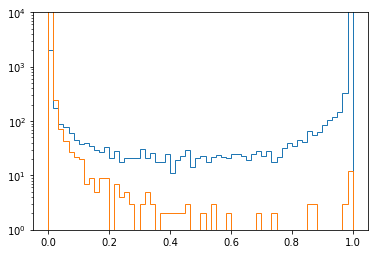

In [9]:
# just testing the way the histogram looks for the entire dataset combined
plt.hist(sigpredict, bins=60, histtype='step')
plt.hist(backpredict, bins=60, histtype='step')
plt.yscale('log')
plt.ylim(1,10**4)
plt.show()

In [5]:
# these lines were just for testing
bins = 20
ranges = np.arange(start=0, stop=1+(1/bins), step=(1/bins))
print(ranges)
# this line is for loading the model more conveniently 
model2 = keras.models.load_model("final_saved_model_tests3")

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


300
(64742, 1)
(133874, 1)


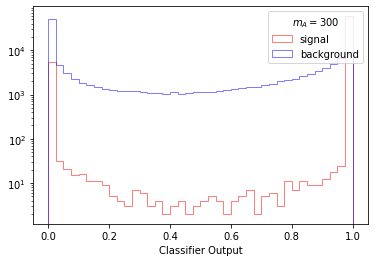

420
(3202, 1)
(134155, 1)


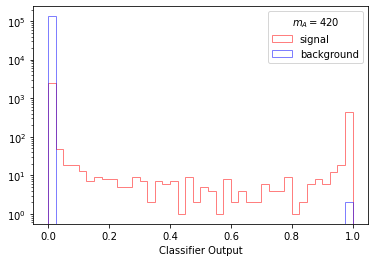

440
(3299, 1)
(134023, 1)


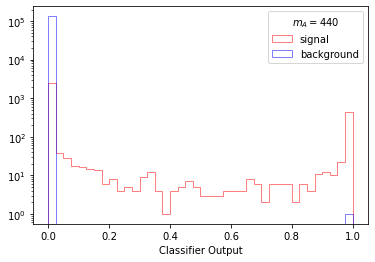

460
(3510, 1)
(133020, 1)


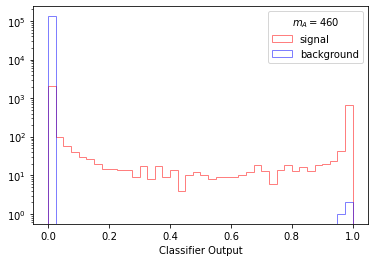

500
(3744, 1)
(133891, 1)


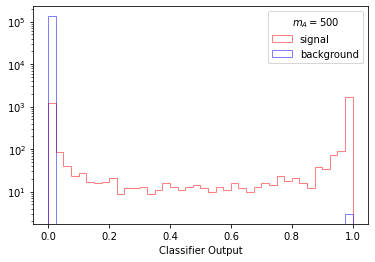

600
(4449, 1)
(132952, 1)


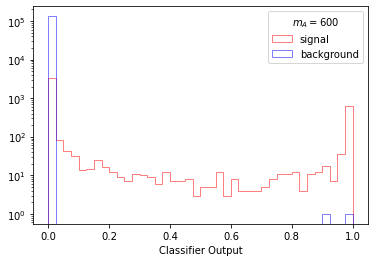

700
(125078, 1)
(134678, 1)


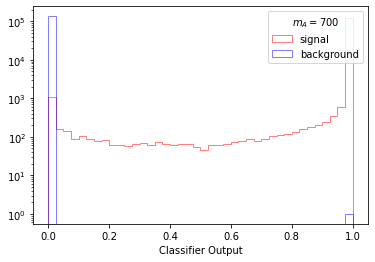

800
(5361, 1)
(134191, 1)


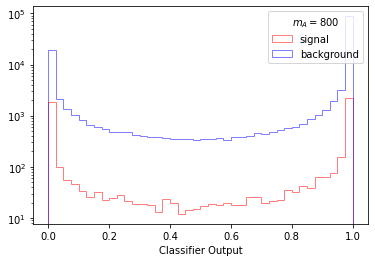

900
(5633, 1)
(134217, 1)


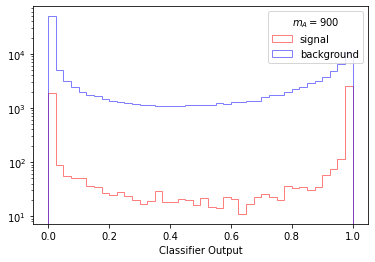

1000
(133296, 1)
(133554, 1)


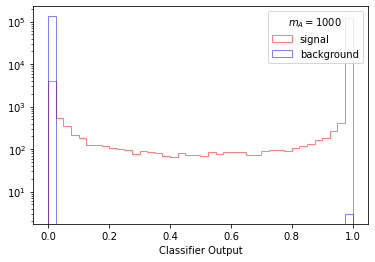

1400
(3730, 1)
(133885, 1)


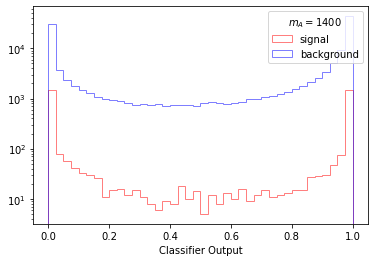

1600
(2720, 1)
(133801, 1)


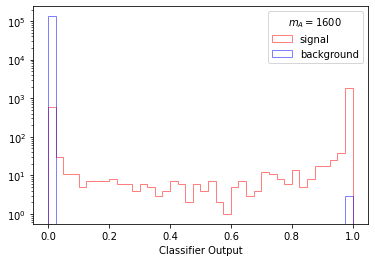

2000
(37359, 1)
(134570, 1)


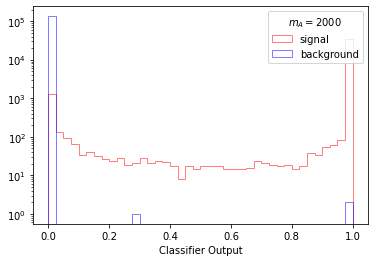

In [4]:
# This is previous work that is invalid now and can be ignored for the current approach taken

signal_masses = [300, 420, 440, 460, 500, 600, 700, 800, 900, 1000, 1400, 1600, 2000] #no for 400 and 1200
model2 = keras.models.load_model("final_saved_model_tests3")
bins = 20
ranges = np.arange(start=0, stop=1+(1/bins), step=(1/bins))
for i in range(len(signal_masses)):
    mixedset = np.loadtxt(str(signal_masses[i])+"normalised.csv", delimiter=",")
    backgroundonly = np.loadtxt(str(signal_masses[i])+"true.csv", delimiter=",")
    #print(mixedset.shape)
    #print(signalonly.shape)
    print(signal_masses[i])
    prediction = model2.predict(mixedset)
    print(prediction.shape)
    background = model2.predict(backgroundonly)
    print(background.shape)
    plt.hist(prediction, bins = 40, histtype='step', align='mid', label ='signal', color='red', alpha = 0.5)
    #plt.bar(x, prediction, width=width, align='edge', label = "signal", color='red', alpha =0.5)
    plt.hist(background, bins = 40, histtype='step', align='mid', label ='background', color='blue', alpha = 0.5)
    #plt.bar(x, signals, width=width, align='edge', label = "background", color='blue', alpha =0.5)
    plt.legend(title=fr'$m_A = ${signal_masses[i]}')
    plt.yscale('log')
    plt.xlabel('Classifier Output')
    plt.savefig('graphs/test3/output_' + str(signal_masses[i]) + '.png')
    plt.show()
    


In [30]:
signal_masses = [300, 420, 440, 460, 500, 600, 700, 800, 900, 1000, 1200, 1400, 1600, 2000]

In [46]:
#significance calculation
bincount = 20
bin_width = 1/ bincount
test_masses = [440]
prediction_list = []
sigmalist = []
signalslist = []
backgroundslist = []
for i in range(len(signal_masses)):
    sigma = 0.0
    signals = []
    backgrounds = []
    prob_weight_label = np.loadtxt(str(signal_masses[i])+"testprobweightlabel.csv", delimiter=",")
    signal_label = prob_weight_label[:, 2] == 1.0
    back_label = prob_weight_label[:, 2] == 0.0
    s_expected = prob_weight_label[signal_label]
    b_expected = prob_weight_label[back_label]
    
    #normalising weights
    s_expected[:,1] = s_expected[:,1] / s_expected[:, 1].sum()
    b_expected[:,1] = b_expected[:,1] / b_expected[:, 1].sum()
    
    
    signal_prob = (s_expected[:, 0] > 0.0) & (s_expected[:, 0] <= bin_width)
    back_prob = (b_expected[:, 0] > 0.0) & (b_expected[:, 0] <= bin_width)
    signals.append(s_expected[signal_prob][:, 1].sum())
    backgrounds.append(b_expected[back_prob][:, 1].sum())
    
    # grouping weights by probabilities 
    for i in np.arange(bin_width, 1, bin_width):
        signal_prob = (s_expected[:, 0] > i) & (s_expected[:, 0] <= i + bin_width)
        back_prob = (b_expected[:, 0] > i) & (b_expected[:, 0] <= i+ bin_width)
        signals.append(s_expected[signal_prob][:, 1].sum())
        backgrounds.append(b_expected[back_prob][:, 1].sum())
    
    #sigma calculation
    for si, bi in zip(signals, backgrounds):
        if (si != 0.0) & (bi == 0.0):
            bi = b_expected[:, 1].sum() / len(b_expected)  
            sigma += 2 * ((si + bi) * np.log(1 + (si / bi)) - si)
        elif (si == 0.0) & (bi == 0.0):
            sigma += 0.0
        elif bi < 0:
            bi = b_expected[:, 1].sum() / len(b_expected)
            sigma += 2 * ((si + bi) * np.log(1 + (si / bi)) - si)
        else:
            sigma += 2 * ((si + bi) * np.log(1 + (si / bi)) - si)
            
    sigmalist.append(sigma)
    backgroundslist.append(backgrounds)
    signalslist.append(signals)

C:\Users\lewis\AppData\Local\Temp/ipykernel_15876/3784466061.py:39: RuntimeWarning: invalid value encountered in double_scalars
  bi = b_expected[:, 1].sum() / len(b_expected)


In [50]:
# as you can see in the above output, there is a divide by 0 error for calculating the siginificance for the 1200 mass, i'll fix this later due to the slow and dangerous nature of creating the csv files (sometimes crashes my pc)
print(prob_weight_label[2][2])
print(signal_label)
print(s_expected[:,1])
print(signals)
print(sigmalist)
print(len(sigmalist))
print(len(signal_masses))
print(signal_masses[10])

1.0
[ True  True  True ... False False False]
[1.78769682e-05 1.19443816e-05 2.00729354e-05 ... 6.92851392e-05
 1.08322719e-04 3.98350575e-05]
[0.0008606353141254324, 0.00017211547764774774, 9.362210778235079e-05, 7.026510623883437e-05, 3.828512323932292e-05, 0.0, 6.24853207487123e-05, 1.517059007268769e-05, 2.7551635496653538e-05, 1.7244264372992722e-05, 1.3285681878891659e-05, 2.2296550251779098e-06, 1.5155954199329232e-05, 0.0, 4.6206383679761943e-05, 5.175284284358093e-05, 2.030692171184815e-05, 6.998857905970688e-05, 0.00038775445406367796, 0.9980359445878133]
[1.6688928328068409, 1.350700225832729, 1.3496691085508745, 1.3489200599967146, 1.3550393024846525, 1.3592192570866373, 1.2556428941164293, 1.3766602516094775, 1.3804873589002729, 1.2682658355673497, nan, 1.3531217234584245, 1.3438786331420611, 1.9821884977601874]
14
14
1200


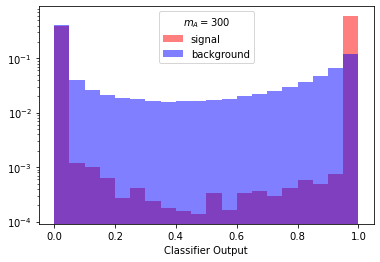

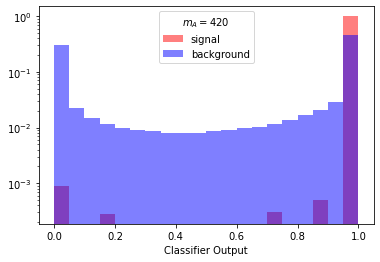

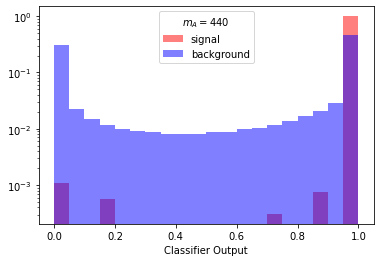

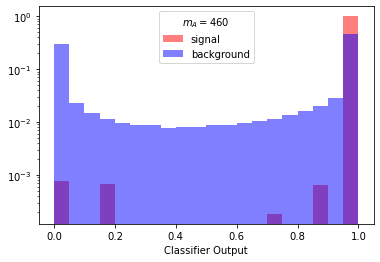

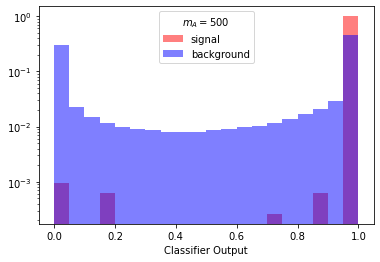

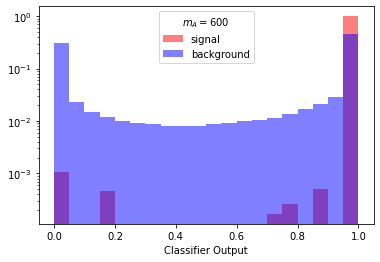

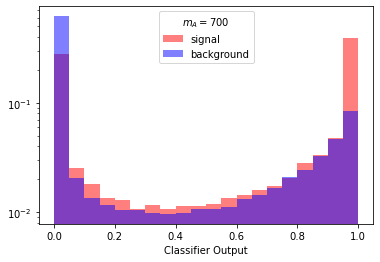

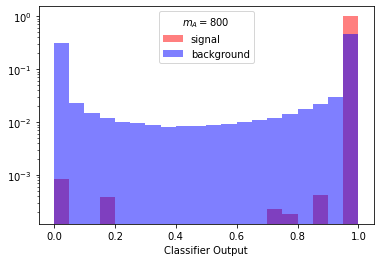

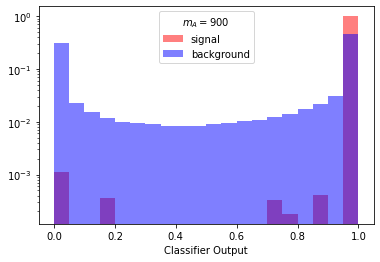

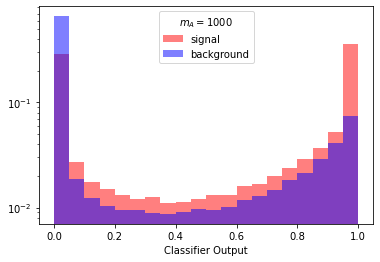

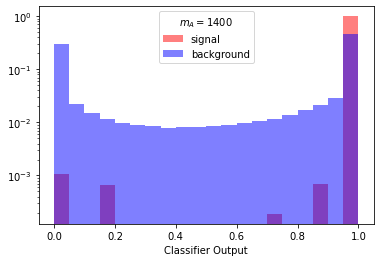

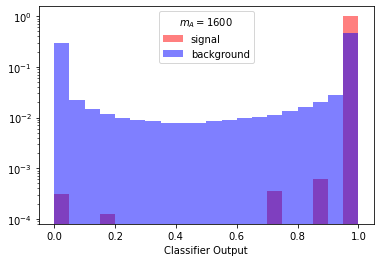

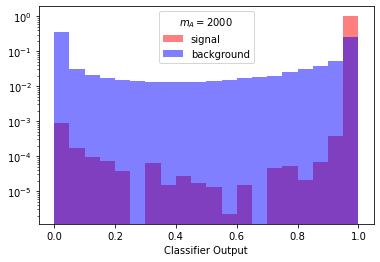

In [55]:
#creating plots of the weights for each mass, 

signal_range = [300, 420, 440, 460, 500, 600, 700, 800, 900, 1000, 1400, 1600, 2000] #,1200 excluding 1200 for now because of the above error
x = np.arange(bin_width, 1, bin_width)
for i in range(len(signal_masses)):    
    if signal_masses[i] == 1200:
        continue 
    width = 1/len(signalslist[i])
    x = np.arange(0,1,1/len(signalslist[i]))
    
    plt.bar(x, signalslist[i], width=width, align='edge', label ='signal', color='red', alpha = 0.5)
    #plt.bar(x, prediction, width=width, align='edge', label = "signal", color='red', alpha =0.5)
    plt.bar(x, backgroundslist[i], width=width, align='edge', label ='background', color='blue', alpha = 0.5)
    #plt.bar(x, signals, width=width, align='edge', label = "background", color='blue', alpha =0.5)
    plt.legend(title=fr'$m_A = ${signal_masses[i]}')
    plt.yscale('log')
    plt.xlabel('Classifier Output')
    plt.savefig('graphs/test4/weightsoutput_' + str(signal_masses[i]) + '.png')
    plt.show()